In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2023-05-12 14:17:40.714386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-12 14:17:40.714407: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Specify each path

In [74]:
dataset = 'model/keypoint_classifier/keypointF.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

model_save_path1 = 'model/keypoint_classifier/model.pk1'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [75]:
NUM_CLASSES = 20

# Dataset reading

In [76]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
print (X_dataset.shape)

# read all x values from csv
# x_dataset = []
# with open(dataset, 'r') as file:
#     reader = csv.reader(file)
#     for row in reader:
#         x_dataset.append(row[1:])
# x_dataset

(56788, 42)


In [77]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
print (y_dataset)

[ 0  0  0 ... 19 19 19]


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)
print (y_train.shape)

(42591,)


# Model building

In [79]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# Load the pretrained VGG16 model without the top (fully connected) layers
#  input shape=(None, 42)



# pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(42,1, 3))

# # Freeze the weights of the pretrained layers
# for layer in pretrained_model.layers:
#     layer.trainable = False

# # Add your custom top layers
# flatten_layer = tf.keras.layers.Flatten()(pretrained_model.output)
# dropout_layer = tf.keras.layers.Dropout(0.2)(flatten_layer)
# dense_layer = tf.keras.layers.Dense(20, activation='relu')(dropout_layer)
# dropout_layer = tf.keras.layers.Dropout(0.4)(dense_layer)
# output_layer = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(dropout_layer)

# # Create the final model
# model = tf.keras.models.Model(inputs=pretrained_model.input, outputs=output_layer)
import numpy as np

from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization,Activation,MaxPooling2D
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
# from keras import regularizers
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from tensorflow.keras.applications import VGG16
# from keras.models import Model
import tensorflow as tf
from keras.metrics import AUC
from keras.metrics import Precision
from keras.metrics import Recall
model = Sequential()

model.add(tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(42,42,3)))

model.add(Flatten())

model.add(Dense(420, activation='relu')) 

model.add(Dense(29, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=[AUC(name = 'Accuracy'),Precision(name = 'Precision'),Recall(name = 'Recall')] )#optimizer = sigmoed

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 420)               215460    
                                                                 
 dense_9 (Dense)             (None, 29)                12209     
                                                                 
Total params: 14,942,357
Trainable params: 14,942,357
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Create an SVM model
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_model = svm.SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [81]:
# model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)
print (accuracy)

0.6868352468831443


In [82]:
# import joblib

# # Load the saved model
# svm_model = joblib.load(model_save_path1)

# # Use the loaded model for prediction
# predictions = svm_model.predict(X_test)
import pickle

# Save the SVM model
with open(model_save_path, 'wb') as f:
    pickle.dump(svm_model, f)

In [83]:
import pickle

# Load the saved SVM model
with open(model_save_path, 'rb') as f:
    svm_model = pickle.load(f)

In [84]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [85]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [86]:
# model.fit(
#     X_train,
#     y_train,
#     epochs=100,
#     validation_data=(X_test, y_test),
#     callbacks=[cp_callback, es_callback]
# )
# #  callbacks=[cp_callback, es_callback]
# # )

In [88]:
# Model evaluation
# val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

In [89]:
# Loading the saved model
# model = tf.keras.models.load_model(model_save_path)
# import joblib

# # Load the saved model
# svm_model = joblib.load(model_save_path)

# Use the loaded model for prediction
predictions = svm_model.predict(X_test)

In [90]:
# Inference test
predict_result = svm_model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

14
0


# Confusion matrix

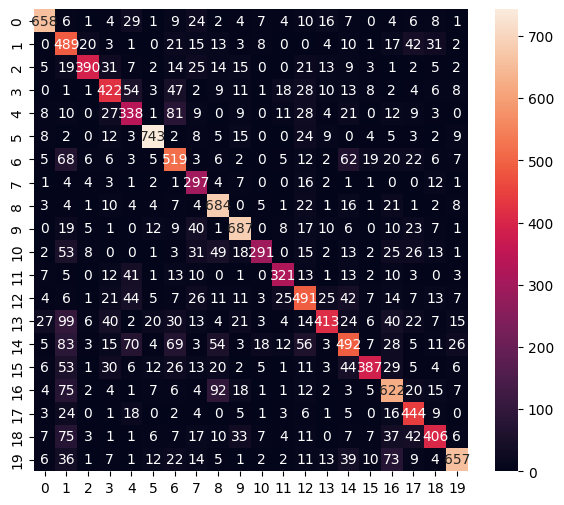

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       801
           1       0.43      0.72      0.54       680
           2       0.86      0.67      0.76       578
           3       0.65      0.65      0.65       648
           4       0.54      0.59      0.57       571
           5       0.88      0.87      0.88       854
           6       0.58      0.67      0.62       778
           7       0.53      0.83      0.65       357
           8       0.70      0.86      0.77       799
           9       0.79      0.80      0.80       856
          10       0.83      0.53      0.64       553
          11       0.76      0.70      0.73       456
          12       0.60      0.64      0.62       770
          13       0.77      0.51      0.61       810
          14       0.59      0.51      0.55       967
          15       0.82      0.58      0.68       664
          16       0.63      0.69      0.66       901
     

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = svm_model.predict(X_test)
# y_pred = np.argmax(Y_pred, axis = 

print_confusion_matrix(y_test, Y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
# model.save(model_save_path, include_optimizer=False)

In [93]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(svm_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

AttributeError: 'SVC' object has no attribute 'call'

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 930 µs, sys: 76 µs, total: 1.01 ms
Wall time: 691 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00471558 0.01729789 0.00435469 0.00539728 0.00788495 0.01413015
 0.08574763 0.00084375 0.00916284 0.00056139 0.00132342 0.00433409
 0.04865796 0.00516032 0.17417783 0.07466332 0.00122002 0.00121774
 0.13399555 0.4051536 ]
19
